# Visualisasi Geospatial Data Covid-19 di Indonesia
Dendy Andra A.N - 1301184280 <br>
IF-42-GAB01

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'geoplot'

## Import shapefile provinsi di Indonesia

In [2]:
prov = gpd.read_file("geospatial/SHP Indonesia/prov.shp")
prov.head()

,NAME_0,NAME_1,KODE,geometry
0,Indonesia,Bangka Belitung,19,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
1,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0..."
2,Indonesia,Riau,14,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ..."
3,Indonesia,Jakarta Raya,31,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
4,Indonesia,Kepulauan Riau,21,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ..."


In [3]:
prov.shape

(34, 4)

## Import data covid-19 per provinsi

### Import json file

In [4]:
cov_data = pd.read_json('data covid provinsi.json')
cov_data.head()

,last_date,current_data,missing_data,tanpa_provinsi,list_data
0,2021-12-01,100,0,0,"{'key': 'DKI JAKARTA', 'doc_count': 20.2979797..."
1,2021-12-01,100,0,0,"{'key': 'JAWA BARAT', 'doc_count': 16.62923908..."
2,2021-12-01,100,0,0,"{'key': 'JAWA TENGAH', 'doc_count': 11.4269034..."
3,2021-12-01,100,0,0,"{'key': 'JAWA TIMUR', 'doc_count': 9.383942593..."
4,2021-12-01,100,0,0,"{'key': 'KALIMANTAN TIMUR', 'doc_count': 3.717..."


In [5]:
cov_data.shape

(34, 5)

### Ekstraksi data covid-19

In [6]:
data = []
for i in range(len(cov_data)):
    tmp = dict(cov_data['list_data'].iloc[i])
    data.append({
        'provinsi': str(tmp['key']).lower(),
        'doc_count': (tmp['doc_count']),
        'jumlah_kasus': tmp['jumlah_kasus'],
        'jumlah_sembuh': tmp['jumlah_sembuh'],
        'jumlah_meninggal': tmp['jumlah_meninggal'],
        'jumlah_dirawat': tmp['jumlah_dirawat'],
        'lon': tmp['lokasi']['lon'],
        'lat': tmp['lokasi']['lat'],
    })
len(data)


34

In [7]:
cov_df = pd.DataFrame(data)
cov_df.head()

,provinsi,doc_count,jumlah_kasus,jumlah_sembuh,jumlah_meninggal,jumlah_dirawat,lon,lat
0,dki jakarta,20.297980,864017,849873,13596,548,106.836118,-6.204699
1,jawa barat,16.629239,707851,692095,14737,1019,107.603708,-6.920432
2,jawa tengah,11.426903,486405,454833,30224,1348,110.201115,-7.259097
3,jawa timur,9.383943,399443,369523,29697,223,112.732941,-7.723346
4,kalimantan timur,3.717417,158238,152712,5449,77,116.468440,0.453858


In [8]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   provinsi          34 non-null     object 
 1   doc_count         34 non-null     float64
 2   jumlah_kasus      34 non-null     int64  
 3   jumlah_sembuh     34 non-null     int64  
 4   jumlah_meninggal  34 non-null     int64  
 5   jumlah_dirawat    34 non-null     int64  
 6   lon               34 non-null     float64
 7   lat               34 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.2+ KB


In [9]:
cov_df.describe()

,doc_count,jumlah_kasus,jumlah_sembuh,jumlah_meninggal,jumlah_dirawat,lon,lat
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.941176,125196.029412,120723.529412,4231.529412,240.970588,113.723129,-2.774664
std,4.617223,196539.733766,190893.021462,7294.724064,399.777399,10.165408,3.699775
min,0.278011,11834.000000,11374.000000,261.000000,0.000000,96.910522,-8.682205
25%,0.726155,30910.000000,29744.500000,794.500000,35.500000,106.219236,-5.882722
50%,1.197780,50985.500000,48121.500000,1675.000000,82.000000,113.075298,-2.727671
75%,2.658020,113143.000000,109408.250000,3666.500000,210.250000,120.941333,0.137409
max,20.297980,864017.000000,849873.000000,30224.000000,1706.000000,138.696030,4.225615


## Gabung data covid dengan shapefile provinsi

### Preprocessing data sebelum merge

In [10]:
# convert jd lowercase
prov['NAME_1'] = prov['NAME_1'].str.lower()

In [11]:
# list nama provinsi di shp
list1 = list(prov['NAME_1'].unique())
len(list1)

34

In [12]:
# list nama provinsi di dataset covid
list2 = list(cov_df['provinsi'].unique())
len(list2)

34

In [13]:
# mencari perbedaan penamaan provinsi
for i in range(34):
    if list2[i] not in list1:
        print('list2[i]', list2[i])

list2[i] dki jakarta
list2[i] daerah istimewa yogyakarta
list2[i] kepulauan bangka belitung


In [14]:
# replace nama provinsi yang berbeda
prov['NAME_1'].replace({
    'bangka belitung': 'kepulauan bangka belitung', 
    'jakarta raya': 'dki jakarta', 
    'yogyakarta': 'daerah istimewa yogyakarta'}, 
    inplace=True)

In [15]:
# merge dataset shp dengan dataset covid
covid_prov = prov.merge(cov_df, left_on="NAME_1", right_on="provinsi")
covid_prov.drop(['NAME_0', 'NAME_1', 'KODE','doc_count', 'jumlah_sembuh', 'jumlah_meninggal', 'jumlah_dirawat'], axis=1, inplace=True)
covid_prov.head()

,geometry,provinsi,jumlah_kasus,lon,lat
0,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",kepulauan bangka belitung,52282,106.549932,-2.447444
1,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",gorontalo,11834,122.376058,0.687003
2,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...",riau,128821,101.805109,0.511648
3,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...",dki jakarta,864017,106.836118,-6.204699
4,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...",kepulauan riau,53884,108.261746,3.916346


## Visualisasi Geospatial

E:\Program Files\Anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
E:\Program Files\Anaconda3\envs\geo_env\lib\site-packages\geoplot\geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

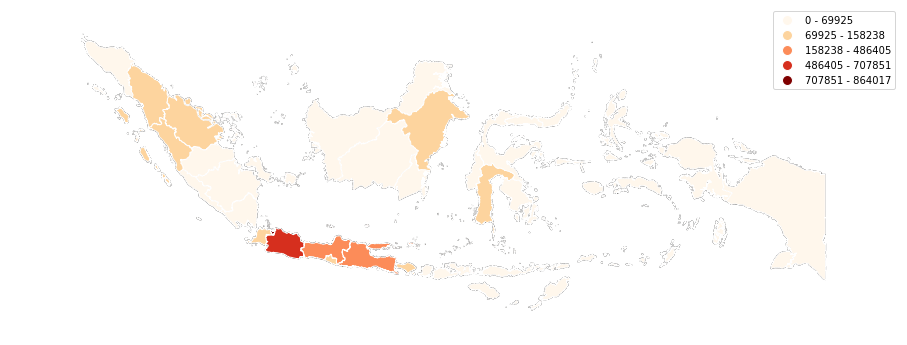

In [16]:
ax1 = gplt.polyplot(covid_prov, figsize=(16,12))
gplt.choropleth(
    covid_prov, 
    ax=ax1, 
    hue="jumlah_kasus",
    edgecolor="white",
    linewidth=1,
    cmap="OrRd",
    legend=True,
    scheme="FisherJenks"
)